In [32]:
import edoxrd as xrd
import peakutils as pk
import edoxrd as xrd
import matplotlib as mpl

def figsize(scale):
    fig_width_pt = 345                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.7),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

In [33]:
data_dir = '/users/zatterin/Documents/data/XRD/'
img_dir ='/users/zatterin/Documents/report/img/'

In [34]:
tot_samples = !ls {data_dir} | grep e1
for sample in tot_samples: print(sample),

e16006 e16014 e16018 e16019 e16020 e16020E e16037 e16043 e16046 e16048 e16050 e16051 e16052 e16054 e16056 e16061 e16065 e16088 e16089 e16090 e16095 e16109 e16111 e16122 e17001 e17002 e17004


In [35]:
sample_list = ['e17002','e16019','e16014','e16089','e16018','e16088','e16020','e16095'] # t ordered
# sample_list = ['e17002','e16014','e16088','e16095']

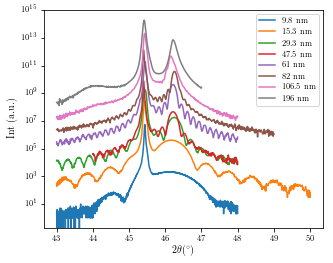

In [37]:
theta_peaks = []
sub_theta =[]
film_theta =[]
sample_thickness = [9.8,15.3,29.3,47.5,61,82,106.5,196] # manual input from excel file
# sample_thickness = [9.8,29.3,82,106.4]
fig = plt.figure(figsize=(5,4))
for index, sample_name in enumerate(sample_list):
    temp = !ls {data_dir + sample_name} | grep ras | grep '002' | grep t2t
    if len(temp) != 1:
        scan = temp[1]
    else:
        scan = temp[0]
    
    theta, I = xrd.read_data(scan,data_dir+sample_name+'/')
#     plt.subplot(121)
    plt.plot(theta, I*(10**(int(index))),label=str(sample_thickness[index])+ ' nm');plt.yscale('log')
    plt.xlabel(r'$2\theta (^{\circ})$')
    plt.ylabel('Int (a.u.)')
    plt.legend()
    # peak positions
    idxs = pk.indexes(I, thres=1e-4, min_dist=1) # idexes of peaks
    sub_peak = I[idxs].argsort()[::-1][0] # index of sub peak
    film_peak = I[idxs].argsort()[::-1][1] # index of film peak
    theta_film = theta[idxs[film_peak]] # theta of film peak
    theta_sub = theta[idxs[sub_peak]] # theta of sub peak
    delta_theta = theta_film - theta_sub # diff between the above
    theta_peaks.append(delta_theta)
    sub_theta.append(theta_sub)
    film_theta.append(theta_film)
    
# plt.subplot(122)
# plt.plot(sample_thickness,sub_theta/max(sub_theta),'-o');
# plt.plot(sample_thickness, film_theta/max(film_theta),'-o')
# plt.plot(sample_thickness,theta_peaks,'--o')
# plt.xlabel('Thickness [nm]')
# plt.ylabel(r'$\Delta\theta = \theta_{film}-\theta_{sub}$')
plt.savefig(img_dir+'test4.pgf')
plt.show()

In [26]:
from matplotlib2tikz import save as tikz_save
fig
tikz_save(img_dir+'test3.tex',figure=fig,figurewidth='0.6\\textwidth', textsize=1.0, tex_relative_path_to_data='./img/')

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}


In [7]:
import matplotlib2tikz as tt

In [8]:
tt.get_tikz_code?